# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



The entropy given by H would be H = the summation of i=1 to n P(e base i) log base 2 p(e base i)
H = -(0.7 x log base 2(0.7) + 0.3 x log base 2 (0.3) )
H = 0.88129
The entropy value isn't as larger that 1 because it can't be it ranges from 0 to 1. 1 being th highst value it could be if the factor of surprise is high that would be if the odds were 0.5 for each side of the coin meaining it could go either way, but here since the proability of heads is higher than the proability of tails the entropy value decreased 

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

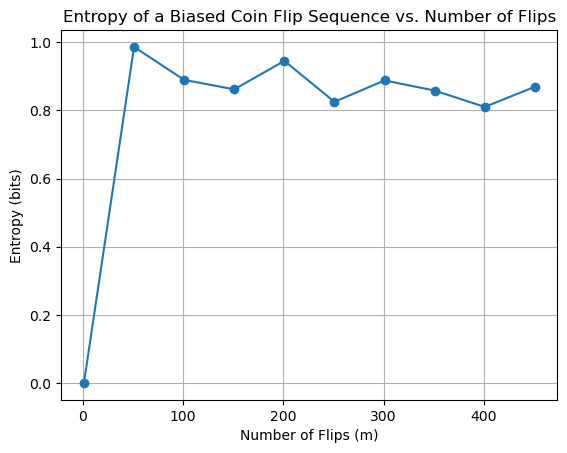

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    p_nonzero = p[p > 0]
    return -np.sum(p_nonzero * np.log2(p_nonzero))

# Probabilities for the biased coin
p_heads = 0.7
p_tails = 0.3

m_values = range(1, 501, 50)

entropy_values = []

for m in m_values:
    flips = np.random.choice(['H', 'T'], size=m, p=[p_heads, p_tails])
    
    p_heads_est = np.count_nonzero(flips == 'H') / m
    p_tails_est = 1 - p_heads_est
    
    entropy_values.append(entropy(p=np.array([p_heads_est, p_tails_est])))

plt.plot(m_values, entropy_values, marker='o')
plt.title('Entropy of a Biased Coin Flip Sequence vs. Number of Flips')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.show()



#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



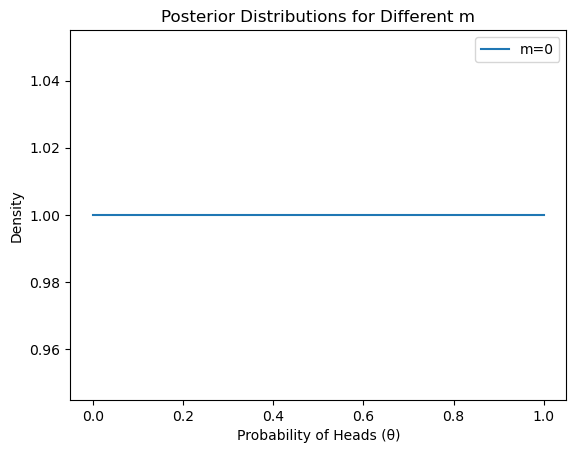

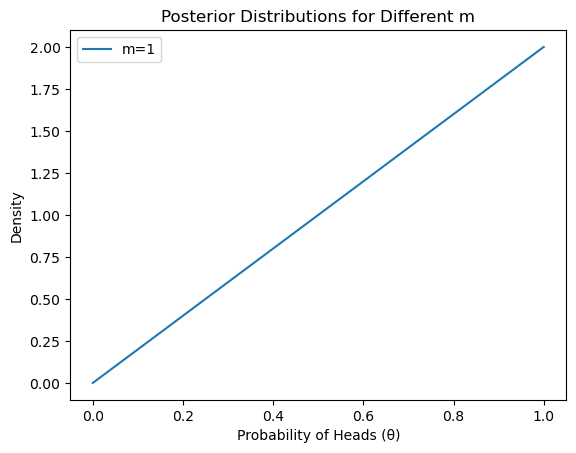

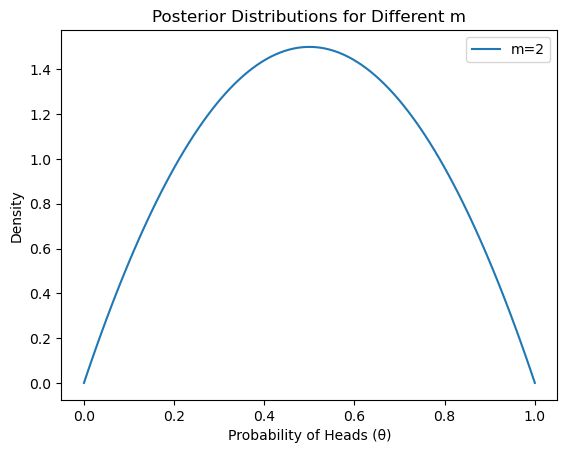

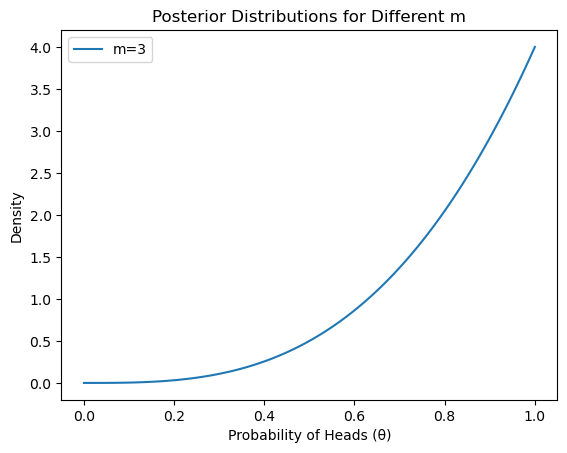

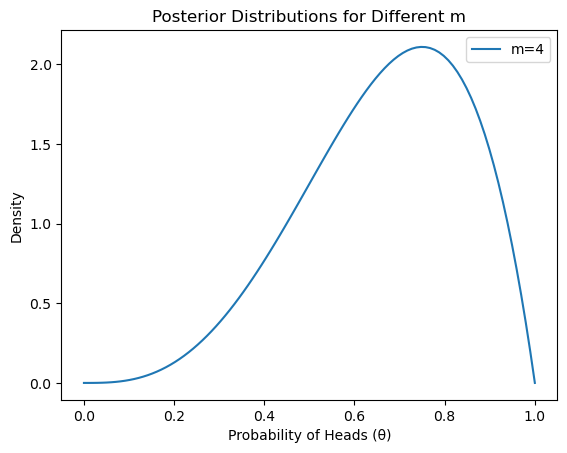

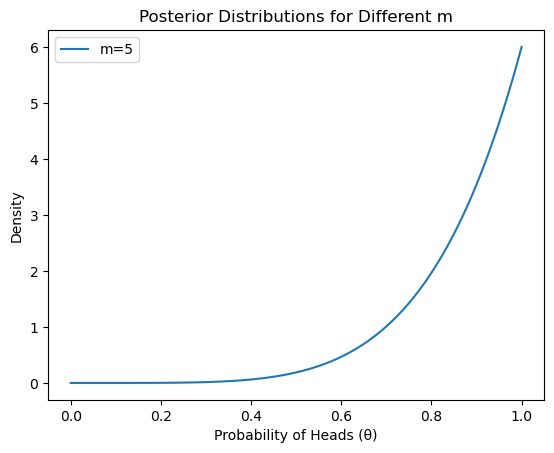

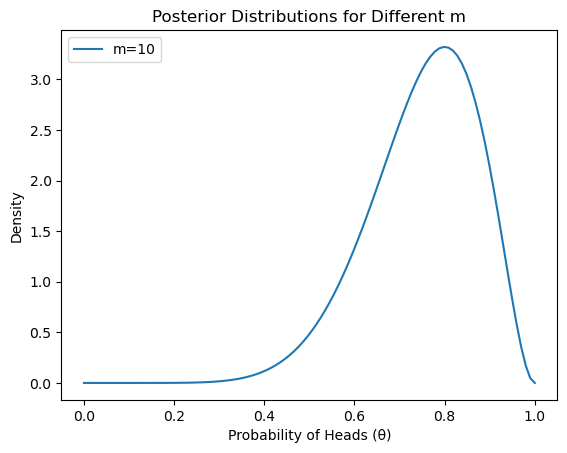

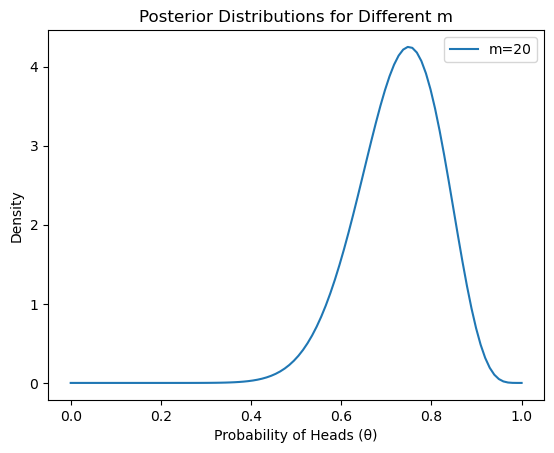

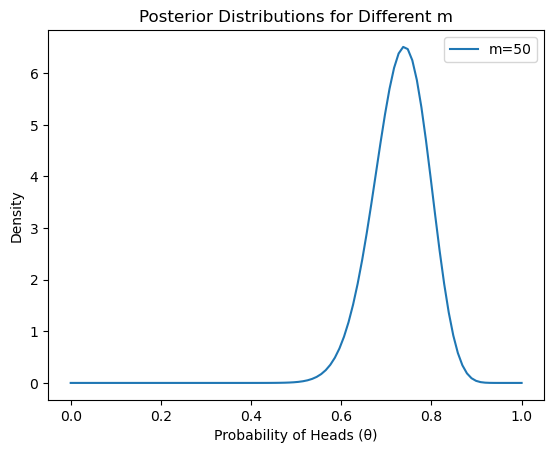

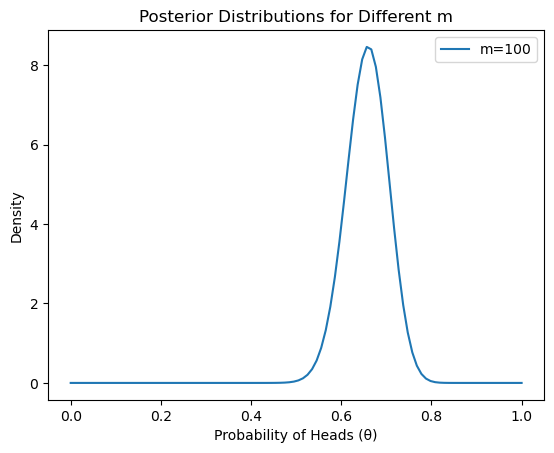

m, Mean, Variance
0, 0.5000, 0.0833
1, 0.6667, 0.0556
2, 0.5000, 0.0500
3, 0.8000, 0.0267
4, 0.6667, 0.0317
5, 0.8571, 0.0153
10, 0.7500, 0.0144
20, 0.7273, 0.0086
50, 0.7308, 0.0037
100, 0.6569, 0.0022


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# a dunction to update the hyperparameters of beta as trials increase 
def update_beta(count, a_prior, b_prior):
    #the number of heads and tails is calculated using a numpy attay
    # and the attribute of the sum the array is incremented in the for loop
    #as more coins are flipped
    heads = np.sum(count == 'H')
    tails = np.sum(count == 'T')
    a_post = a_prior + heads # the value of a is updated with the number of heads
    b_post = b_prior + tails 
    
    mean = a_post / (a_post+b_post)
    var = (a_post * b_post) / ((a_post+b_post) ** 2 * (a_post + b_post + 1) )
    return mean , var
    
# we set the inital values of a and b to 1 so there would be
#no bias since the mean will equal 0.5 
# the values are updated as we get more heads or tails
a_prior = 1
b_prior = 1
#the number of trials stored in an array
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

mean_var_results = []

# we iterate over all the values in the array to cover all trials
for m in m_values:
    # Generate a random sequence of H and T while mainting the probalitis of 0.7 for heads and 1-0.7 for tails
    sequence = np.random.choice(['H', 'T'], size=m, p=[0.7, 0.3])
    # the value of a and b in the beta function is updadted after we get the number of heads and tails
    mean_post, var_post = update_beta(sequence, a_prior, b_prior)
    #the table is created with the number of trials next ot he mean and variance 
    mean_var_results.append((m, mean_post, var_post))

    #every graph is plotted sepreatly to make it easier to see the differnces you can remove the indentation to see the graphs next to each other
    # Plotting
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a_prior + np.sum(sequence == 'H'), b_prior + np.sum(sequence == 'T'))
    plt.plot(x, y, label=f'm={m}')
    plt.xlabel('Probability of Heads (θ)')
    plt.ylabel('Density')
    plt.title('Posterior Distributions for Different m')
    plt.legend()
    plt.show()

#after plotting the graphs we see that in the first trial the probablity is uniform since there was no trials before it that affected it 
#in the trial with one flip the graph is linear 
# as we increase the number of the trials the graph starts converging and unravling the true value of the mean 
# this happens because the beta function calculates the probaility based on previous trials we see that we almost get to the value of the mean as we increase the trials
# it's sometimes larger or smaller but it's much closer than the first couple of trials


# Displaying the table with mean and variance
print("m, Mean, Variance")
for result in mean_var_results:
    print(f"{result[0]}, {result[1]:.4f}, {result[2]:.4f}")



### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

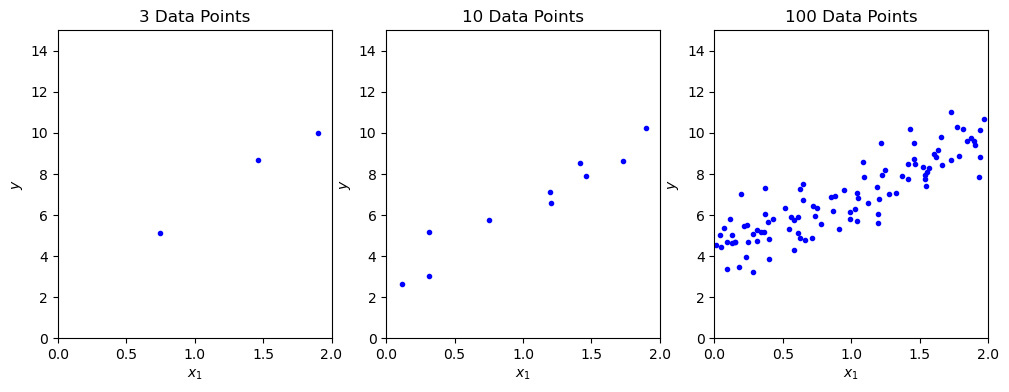

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(m):
    np.random.seed(42)  # to make this code example reproducible
    X = 2 * np.random.rand(m, 1)  # number of instances
    y = 4 + 3 * X + np.random.randn(m, 1)  # column vector # column vector
    return X, y

# Generating datasets for different values of m
m_values = [3, 10, 100]
datasets = {}

for m in m_values:
    X, y = generate_dataset(m)
    datasets[m] = (X, y)

# Plotting the datasets
plt.figure(figsize=(12, 4))
for i, m in enumerate(m_values):
    plt.subplot(1, len(m_values), i + 1)
    plt.plot(datasets[m][0], datasets[m][1], "b.")
    plt.title(f"{m} Data Points")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$")
    plt.axis([0, 2, 0, 15])

plt.show()


#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

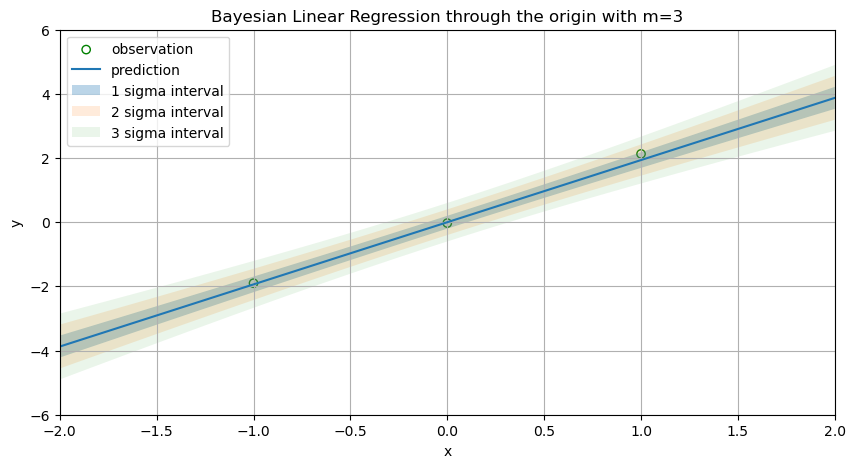

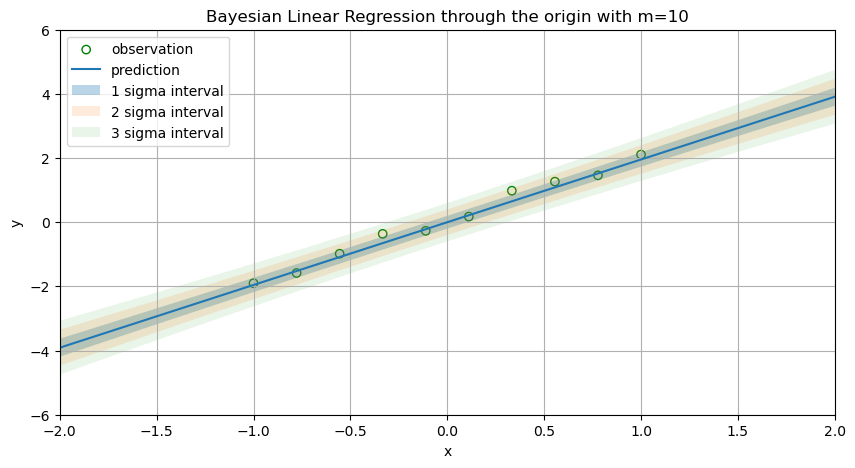

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

alpha = 2.0  # Precision of the prior
beta = 25.0  # Known noise variance (sigma squared)
sigma = np.sqrt(1/beta)  # Standard deviation of the noise

# Generate synthetic linear data with added gaussian noise
def generate_data(m, sigma):
    np.random.seed(42)  # Seed for reproducibility
    X = np.linspace(-1, 1, m)  # Generate m X values between -1 and 1
    y = 2 * X + sigma * np.random.randn(m)  # Linear relation with noise
    return X, y

# Bayesian update for linear regression through the origin
def bayesian_update(X, y, alpha, beta):
    # Calculate precision and mean for the posterior distribution
    precision = alpha + beta * np.sum(X**2)
    #alpha: Precision of the prior (reflects the confidence in the prior). 
    #beta: Known noise variance (inverse of sigma^2).
    mean = beta * np.sum(X*y) / precision
    return mean, 1/precision

# Predict using the Bayesian linear model
def predict(X, mean, variance, beta):
    # Predictive mean
    y_mean = mean * X
    # Predictive variance
    y_variance = (1/beta) + variance * X**2
    return y_mean, np.sqrt(y_variance)
    # the function outputs the predictve mean and the standard deviation of predictions

# Plot the regression and confidence intervals
def plot(X, y, X_pred, y_mean, y_std, m, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, facecolor="none", edgecolor="g", label="observation")
    plt.plot(X_pred, y_mean, label="prediction")
    for i in range(1, 4):
        plt.fill_between(X_pred, y_mean - i * y_std, y_mean + i * y_std, alpha=0.3/i, label=f"{i} sigma interval")
    plt.xlim(-2, 2)
    plt.ylim(-6, 6)
    plt.title(f"Bayesian Linear Regression through the origin with m={m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# heart of the code
# Run Bayesian linear regression and plot for m=3 and m=10
for m in [3, 10]:
    X, y = generate_data(m, sigma)
    # we first generate data points 
    # and we update the mean and variance for each graph as the data points are created
    mean, variance = bayesian_update(X, y, alpha, beta)
    X_pred = np.linspace(-2, 2, 100)
    y_mean, y_std = predict(X_pred, mean, variance, beta)
    plot(X, y, X_pred, y_mean, y_std, m, title=f"Bayesian Linear Regression with m={m}")



in the code above we use Baysian linear Regression to update our beleifs about the models parameters and get the posterior distribution. We have a simple linear model withou an intercpt term y = theta * x + noise

The liklihood P(y|x,theta) is the likelihood of the obeserved data given the parameters x and theta which represents the slope.
The beysian update funnction computes the posterior mean and variance for theta based on the prior data.
An uninformative prior is used when we have no strong initial beliefs about the value of . It's characterized by a mean of zero  and a large variance ,indicating high uncertainty.

We first generate the data usinng the generate_data functions that creates a data points with lnear relationship and noise
 then Baysian update computes the posterior mean and variance based on the observed data and alpha whihc is the perior precision and noise variance beta.

 key points:
 unlike tradidional regression which gives a sigle best fit line, the Baysian approach provides a distribution over possible lines, reglectiong uncertainty in the model.

 The model's predictio uncertainty increases with the distance from the observed data points
